## Simple Linear Regression 

Model representaion = a straight line: $f_{w,b}$(x) = $w$x + $b$

* A <b>supervised</b> learning model (meaning that it learns from labeled data) for predicting a <b>continuous valued output</b> - such as the price of houses (real numbers i.e. scalar values).
* Types of Linear regression: 
** Univariate (simple) linear regression uses one independent variable to predict the output $\hat{y}$ (y_hat). 
** Multiple linear regression uses two or more independent variables to predict $\hat{y}$. Using more variables allows the model to account for more factors that influence y and generally improve predictive accuracy. 


## Linear Regresison - Example 

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has restaurants in various cities and you have data for profits and populations from the cities. 
You would like to use this data to help you identify which cities may potentially give youre business higer profits.
The dataset contains two columns. The first one is the population of a city and the second one is the profit of a food restaurant in that city. A negative value for profit indicates a loss.

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/1.1_data.csv') #read from dataset
data.head(5)

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [88]:
# Note: loc gets rows/columns with particular labels. iloc gets rows/columns at integer locations.
x_train = np.array(data.iloc[:,0]) # city population
y_train = np.array(data.iloc[:,1]) # average monthly profit 
print("Type and size of x_train: ", type(x_train), x_train.shape)
print("First five elements of x_train are: ", x_train[:5])
print("Type and size of y_train: ", type(y_train), y_train.shape)
print("First five elements of y_train are: ", y_train[:5])

Type and size of x_train:  <class 'numpy.ndarray'> (97,)
First five elements of x_train are:  [6.1101 5.5277 8.5186 7.0032 5.8598]
Type and size of y_train:  <class 'numpy.ndarray'> (97,)
First five elements of y_train are:  [17.592   9.1302 13.662  11.854   6.8233]


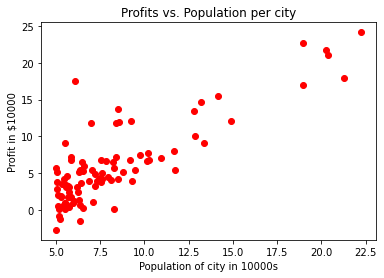

In [89]:
plt.scatter(x_train, y_train, marker='o', color='red')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population of city in 10000s")
plt.show()

In [90]:
def compute_cost(x, y, w, b):
    '''
    Computes the cost function for linear regression.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w, b (scalar): Parameters of the model
    
    Returns:
    total_cost (float): The cost of using w and b as parameters for the model to fit x and y.    
    '''
    
    # number of training examples
    m = x.shape[0]
    
    total_cost = 0
    
    for i in range(m):
        total_cost += (w * x[i] + b - y[i])**2
        
    total_cost = total_cost / (2 * m)
    
    return total_cost

In [91]:
# Test
init_w = 2
init_b = 1
compute_cost(x_train, y_train, init_w, init_b)

75.20338497891959

In [92]:
def compute_gradient(x, y, w, b):
    '''
    Computes the gradient for linear regression.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w, b (scalar): Parameters of the model
    
    Returns:
    dj_dw (scalar): The gradient of the cost with respect to w
    fj_db (scalar): The gradient of the cost with respect to b    
    '''
    
    m = x.shape[0] # same as len(x)
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        diff = w * x[i] + b - y[i]
        dj_dw += diff * x[i]
        dj_db += diff
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db 

In [93]:
# Test
init_w = 0
init_b = 0
dj_dw, dj_db = compute_gradient(x_train, y_train, init_w, init_b)
print("Gradient at (w, b) = (0, 0): ", dj_dw, dj_db)

init_w = 0.2
init_b = 0.2
dj_dw, dj_db = compute_gradient(x_train, y_train, init_w, init_b)
print("Gradient at (w, b) = (0, 0): ", dj_dw, dj_db)

Gradient at (w, b) = (0, 0):  -65.32884974555672 -5.83913505154639
Gradient at (w, b) = (0, 0):  -47.41610118114435 -4.007175051546391


In [130]:
def gradient_descent(x, y, w_in, b_in, cost_func, gradient_func, alpha, num_iters):
    '''
    Performs batch gradient descent to learn parameters w and b.  
    Updates parameters by taking num_iters gradient steps with learning rate alpha.
    
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities)
    y (ndarray): Shape (m,) Label (Actual profits/cities)
    w_in, b_in (scalar): Initial values of parameters of the model
    cost_func: function to compute cost
    gradient_func: function to compute gradients
    alpha (float): Learning rate
    num_iters (int): number of iterations to run gradient descent
    
    Returns:
    w (scalar): Shape (1,) Updated value of parameter w of the model after running gradient descent
    b (scalar): Shape (1,) Updated value of parameter b of the model after running gradient descent 
    '''
 
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_func(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_func(x, y, w, b)
        
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost = {cost:.2f}, w = {w}, b = {b}")
             
            
    return w, b

In [131]:
w_init = 0
b_init = 0
iters = 1500
alpha = 0.01

w, b = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iters)
print(f"\nParams found by gradient descent: w = {w}, b = {b}")

Iteration 0: Cost = 6.74, w = 0.6532884974555673, b = 0.0583913505154639
Iteration 150: Cost = 5.31, w = 0.8888949164626273, b = -0.8683454409370605
Iteration 300: Cost = 4.96, w = 0.9610073805299465, b = -1.5861620466203947
Iteration 450: Cost = 4.76, w = 1.0160217015468063, b = -2.1337815696397477
Iteration 600: Cost = 4.64, w = 1.0579919151026862, b = -2.5515583939951316
Iteration 750: Cost = 4.57, w = 1.090010829330244, b = -2.8702787237710674
Iteration 900: Cost = 4.53, w = 1.114437935638548, b = -3.113429235456871
Iteration 1050: Cost = 4.51, w = 1.1330732809334128, b = -3.2989278240615976
Iteration 1200: Cost = 4.50, w = 1.147290114064432, b = -3.440443982657258
Iteration 1350: Cost = 4.49, w = 1.1581360812883905, b = -3.548406114845482

Params found by gradient descent: w = 1.166362350335582, b = -3.63029143940436


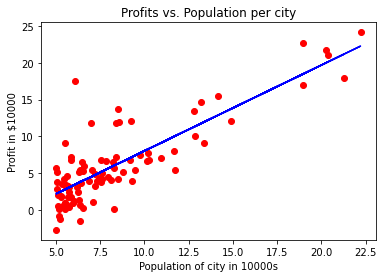

In [133]:
m = x_train.shape[0]
predicted = np.dot(w, x_train) + b 

plt.plot(x_train, predicted, color='blue')
plt.scatter(x_train, y_train, marker='o', color='red')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10000")
plt.xlabel("Population of city in 10000s")
plt.show()

In [147]:
# Using data on city population of cities that are candidates for new restaurants, predict revenue.
population = [3.5, 12.1, 7] # in 10000s

for p in population:
    predict = w * p + b
    print(f"The predicted monthly profit for a city with {p * 10000} citizen is ${predict * 10000:.2f}")

The predicted monthly profit for a city with 35000.0 citizen is $4519.77
The predicted monthly profit for a city with 121000.0 citizen is $104826.93
The predicted monthly profit for a city with 70000 citizen is $45342.45
